In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
# upload the data to jupyter notebook
cardata = pd.read_csv (r'C:\Users\adese\Documents\Msc\Machine Learning\Coursework\cardata.csv')

In [3]:
#display the dataset to viw head, tail and no of colums and rows
print(cardata)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [4]:
# checking datatype of columns
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# checking no of missing values
cardata.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# distribution of categorical data
print(cardata.Fuel_Type.value_counts())
print(cardata.Seller_Type.value_counts())
print(cardata.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [7]:
#Replacing the data with numerical figures via Encoding
# encoding "Fuel_Type" Column
cardata.replace({'Fuel_Type':{'Petrol':1,'Diesel':2,'CNG':3}},inplace=True)

# encoding "Seller_Type" Column
cardata.replace({'Seller_Type':{'Dealer':1,'Individual':2}},inplace=True)

# encoding "Transmission" Column
cardata.replace({'Transmission':{'Manual':1,'Automatic':2}},inplace=True)

In [8]:
#confirming data type change
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0


In [9]:
#Splitting the data and the target
X = cardata.drop(['Car_Name','Selling_Price'],axis=1)
Y = cardata['Selling_Price']

In [10]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          1            1             1   
1    2013           9.54       43000          2            1             1   
2    2017           9.85        6900          1            1             1   
3    2011           4.15        5200          1            1             1   
4    2014           6.87       42450          2            1             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          2            1             1   
297  2015           5.90       60000          1            1             1   
298  2009          11.00       87934          1            1             1   
299  2017          12.50        9000          2            1             1   
300  2016           5.90        5464          1            1             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [11]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [12]:
#Splitting Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [13]:
# loading the linear regression model
linR_model = LinearRegression()
linR_model.fit(X_train,Y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [14]:
# Training data prediction 
predict_training_data = linR_model.predict(X_train)

In [15]:
# R squared Error
Rsquarred_error_score = metrics.r2_score(Y_train, predict_training_data)
print("The R squared Error is : ", Rsquarred_error_score)

The R squared Error is :  0.8799451660493697


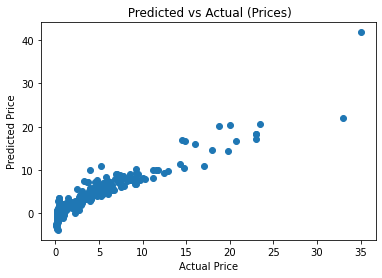

In [16]:
#Display Predicted and Actual prices in a Scattered plot
plt.scatter(Y_train, predict_training_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Predicted vs Actual (Prices)")
plt.show()

In [17]:
# Test data prediction 
predict_test_data = linR_model.predict(X_test)

In [18]:
# R squared Error
Rsquarred_error_score = metrics.r2_score(Y_test, predict_test_data)
print("The R squared Error is : ", Rsquarred_error_score)

The R squared Error is :  0.8365766715026847


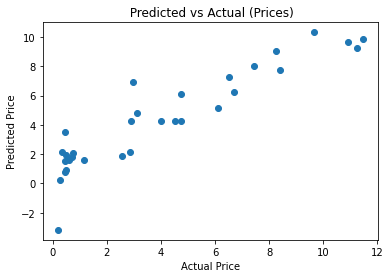

In [19]:
plt.scatter(Y_test, predict_test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Predicted vs Actual (Prices)")
plt.show()

In [20]:
#Lasso Regression

In [21]:
lasR_model = Lasso()

In [22]:
lasR_model.fit(X_train,Y_train)

Lasso()

In [23]:
# prediction on Training data
predict_test_data = lasR_model.predict(X_train)

In [24]:
#R-squared Error
Rsquarred_error_score = metrics.r2_score(Y_train, predict_test_data)
print("The R squared Error is : ", Rsquarred_error_score)

The R squared Error is :  0.8427856123435794


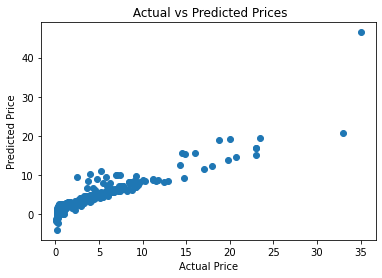

In [25]:
#Display the actual and Predicted prices
plt.scatter(Y_train, predict_test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual vs Predicted Prices")
plt.show()

In [26]:
# Test data prediction
predict_test_data = lasR_model.predict(X_test)

In [27]:
#R-squared Error
Rsquarred_error_score = metrics.r2_score(Y_test, predict_test_data)
print("R squared Error : ", Rsquarred_error_score)

R squared Error :  0.8709167941173195


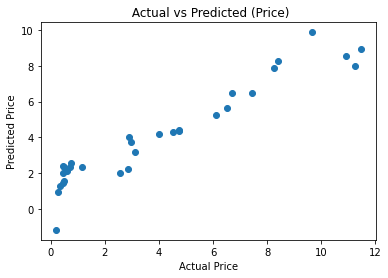

In [28]:
plt.scatter(Y_test, predict_test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual vs Predicted (Price)")
plt.show()